# Data Science

***


WS 2022

Dr. Cristian Grozea


***

## Introduction to Machine Learning


# Course Plan

1. Introduction to Machine Learning (ML)
    * Examples of Applications
    * Types of machine learning
    * Issues around ML
    * Testing and Validation
1. Classification and Regression
    * Datasets
    * Binary classification
    * Accuracy measures
    * Multiclass classification
1. Various model types and Training models
    * Linear regression
    * Polynomial regression
    * Regularisation
    * Logistic Regression
1. Support Vector Machines
1. Decision Trees
1. Ensemble Learning and Random Forest
1. Dimensionality Reduction
1. Unsupervised Learning

    


## Types of Machine Learning (recap.)

* Supervised?
    * Supervised
    * Self-supervised
    * Unsupervised
    * Semi-supervised
    * Reinforcement Learning


## Types of Machine Learning (recap.)


* Online?
    * Batch
    * Online
        
* Parametric? (from statistical models)
    * Model-based (parametric)
    * Non-parametric (non-parametric, purely data-driven)
        

# Issues around ML (recap.)

Generalization issues

* _Overfitting_ the training data
* _Underfitting_ the training data


# Testing and Validation



## Terminology

The _Dataset_ is usually a matrice: rows=samples/examples, columns=features

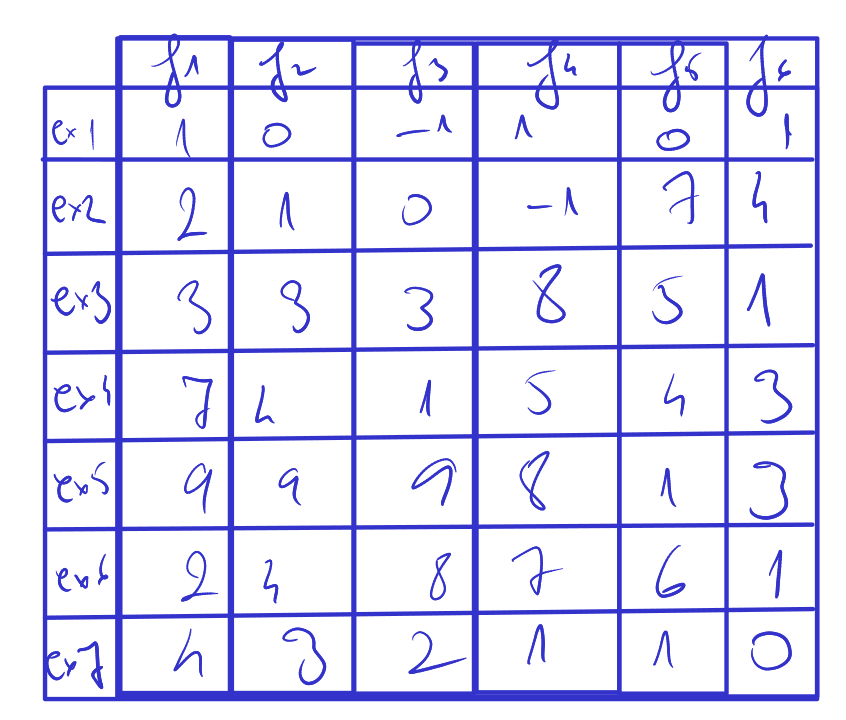

## Data split

* Training set: A=80% of the dataset
* Test set: B=20% of the dataset


Training set split:
  * training subset A1=70% of A
  * validation/dev set: A2=30% of A
      - used to iterate: model/hyperparameter selection
      

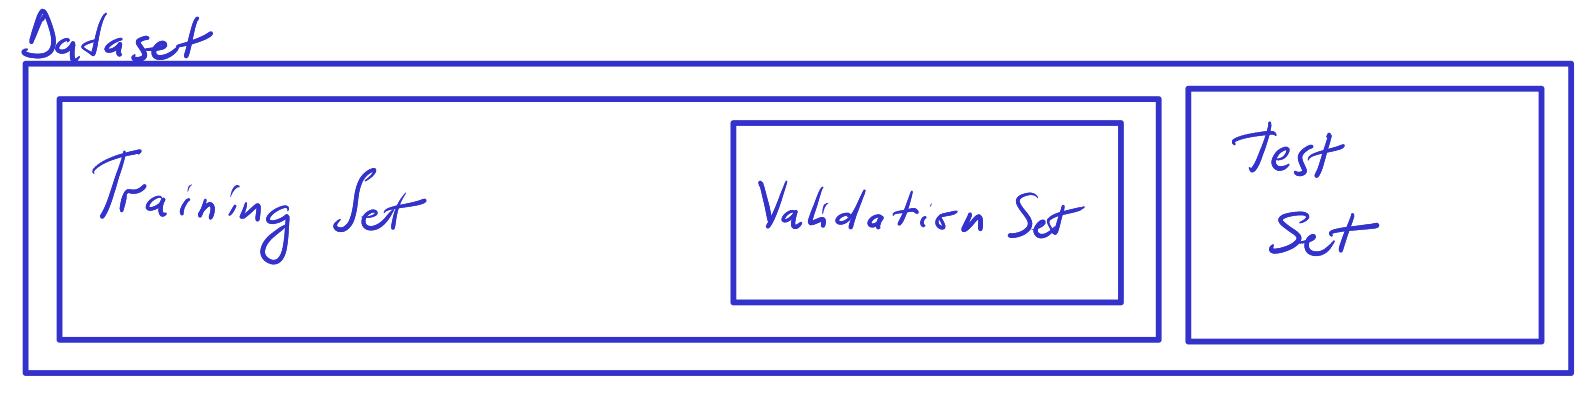

### ML Model

* Mathematical model: linear regression model $f(x)=ax+b$
* The parameters of the model: in this case $(a,b)$
* Implementation in some programming language: e.g. Python / Java ...

In [1]:
import numpy as np
np.random.seed(100)
class MyPolynomialRegressionModel:
    def __init__(self,coefficients):
        self.coefficients=coefficients
    def predict(self,x):
        s=0
        x_pow_i=np.ones(len(x)) #x^0==1
        for i in range(len(self.coefficients)):
            s+=self.coefficients[i]*x_pow_i
            x_pow_i=x_pow_i*x
        return s
    def fit(self,x,y):
        pass # do nothing for now...

$$f(x)=2*x+1$$

In [2]:
m1=MyPolynomialRegressionModel([1,2]) # coefficients passed in reverse order!
x=np.array([0,1,2,3,4])
y=m1.predict(x)
y

array([1., 3., 5., 7., 9.])

$$f(x)=(x-1)^2=x^2-2*x+1$$

In [3]:
m2=MyPolynomialRegressionModel([1,-2,1])
x=np.array([0,1,2,3,4])
y=m2.predict(x)
y

array([1., 0., 1., 4., 9.])

### Implement Model Fitting

In [4]:
import numpy as np
class MyPolynomialRegressionModel:
    def __init__(self,coefficients):
        self.coefficients=coefficients
    def predict(self,x):
        s=0
        x_pow_i=np.ones(len(np.array(x))) #x^0==1
        for i in range(len(self.coefficients)):
            s+=self.coefficients[i]*x_pow_i
            x_pow_i=x_pow_i*x
        return s
    #### new code here! not efficient at all ####
    def fit(self,x,y):
        nr_attempts=100000
        attempts=np.random.rand(nr_attempts,len(self.coefficients))*10-5 # -5 to 5
        evals=[np.linalg.norm(MyPolynomialRegressionModel(trial).predict(x)-y) for trial in attempts]
        pos_mn=np.argmin(evals)
        print(f"min training error {evals[pos_mn]}")
        self.coefficients=attempts[pos_mn]
        return self #nice for chaining
        

In [5]:
m1=MyPolynomialRegressionModel([0,0])
m1.fit(x,3*x)
m1.coefficients

min training error 0.0670417975574061


array([-0.0515837 ,  3.01860648])

### A more complex example

In [6]:
ds_x=np.random.rand(16)*10-5
realmodel=lambda x:3*x*x
ds_y=realmodel(ds_x)+np.random.randn(len(ds_x))*10

splitpoint=int(len(ds_x)*0.6)

x=ds_x[:splitpoint]
y=ds_y[:splitpoint]

x_test=ds_x[splitpoint:]
y_test=ds_y[splitpoint:]


In [7]:
m1=MyPolynomialRegressionModel([0,0,0])
m1.fit(x,y)
m1.coefficients

min training error 24.745686978529836


array([-3.0744702 ,  0.70571893,  2.24594883])

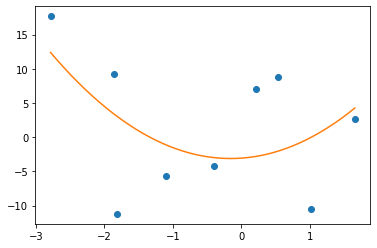

In [8]:
import matplotlib.pyplot as plt
plt.plot(x,y,'o')
x_=np.arange(min(x),max(x),0.01)
plt.plot(x_,m1.predict(x_))

### Higher complexity models

min training error 57.31604990175407


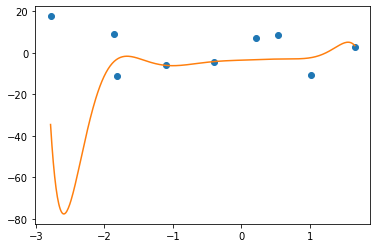

In [9]:
m1=MyPolynomialRegressionModel([0,0,0,0,0,0,0,0,0,0])
m1.fit(x,y)
plt.plot(x,y,'o')
x_=np.arange(min(x),max(x),0.01)
plt.plot(x_,m1.predict(x_))

* Poor fitting 
* The fitting error/the error on the training set should decrease when the flexibility of the model increases, we got it worse
* Does having more random attempts help?
* Our optimisation is poor
    - which is very interesting!
    - why?
    - "the curse of dimensionality" see https://en.wikipedia.org/wiki/Curse_of_dimensionality
   

### Improved Model Fitting

In [10]:
import numpy as np
class MyPolynomialRegressionModel:
    def __init__(self,coefficients):
        self.coefficients=coefficients
    def predict(self,x):
        s=0
        x_pow_i=np.ones(len(np.array(x))) #x^0==1
        for i in range(len(self.coefficients)):
            s+=self.coefficients[i]*x_pow_i
            x_pow_i=x_pow_i*x
        return s
    #### modified code here, faster and more accurate ####
    def fit(self,x,y):
        ax=np.polyfit(x,y,len(self.coefficients)-1)
        self.coefficients=ax[::-1]
        print(f"training error {np.linalg.norm(self.predict(x)-y)}")
        return self #nice for chaining
        

In [11]:
# m1.fit(x,y).coefficients

### Test the new fitting 

In [12]:
m1=MyPolynomialRegressionModel([0,0,0,0,0,0,0,0,0])
m1.fit(x,y)
print(m1.coefficients)
f"test error {np.linalg.norm(m1.predict(x_test)-y_test)}"

training error 2.2708290703539797e-11
[  -0.83637854   34.02163273   35.37010817 -115.68363881  -75.01961631
   96.70019114   43.972027    -20.79597112   -8.14811637]


'test error 884974.8826210952'

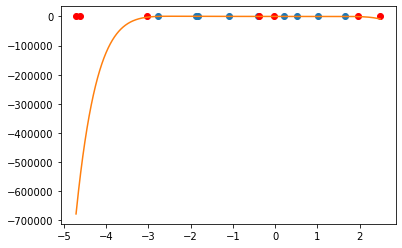

In [13]:
plt.plot(x,y,'o')
plt.plot(x_test,y_test,'ro')
x_=np.arange(min(ds_x),max(ds_x),0.01)
plt.plot(x_,m1.predict(x_))

#### Try higher complexity models that should fit even better

In [14]:
m1=MyPolynomialRegressionModel([0,0,0,0,0,0,0,0,0,0])
m1.fit(x,y)
print(m1.coefficients)
f"test error {np.linalg.norm(m1.predict(x_test)-y_test)}"


training error 5.291915350377709e-12
[  0.42392391  30.08866146  20.44585297 -91.54189728 -37.50822524
  75.30458087  12.68227452 -20.35717343  -1.01476699   1.57380235]


/tmp/ipykernel_8827/2818426460.py:2: RankWarning: Polyfit may be poorly conditioned
  m1.fit(x,y)


'test error 1362272.980011249'

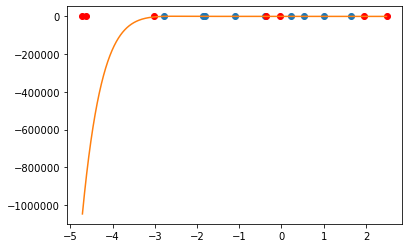

In [15]:
plt.plot(x,y,'o')
plt.plot(x_test,y_test,'ro')
x_=np.arange(min(ds_x),max(ds_x),0.01)
plt.plot(x_,m1.predict(x_))

Bonferoni correction https://en.wikipedia.org/wiki/Bonferroni_correction

* Unstable
* Overfitting
* Did our test data catch this?
* Would it succeed with less test data?

### Trade-Off Training Set Error vs Test Set Error

In [16]:
#two lists to collect the errors for plotting
trainerrors=[]
testerrors=[]
list_complexities=[1+i for i in range(8)] #try more steps as well!
for nrcoeffs in list_complexities:
    m=MyPolynomialRegressionModel([0]*nrcoeffs)#as many coefficients
    m.fit(x,y)
    train_err=np.linalg.norm(m.predict(x)-y)
    trainerrors.append(train_err)
    test_err=np.linalg.norm(m.predict(x_test)-y_test)
    testerrors.append(test_err)
    


training error 28.196889694624943
training error 27.19481505454145
training error 24.742247451468057
training error 21.750670934511803
training error 21.182643780154873
training error 16.31657702045502
training error 14.753912252834446
training error 11.411640667529978


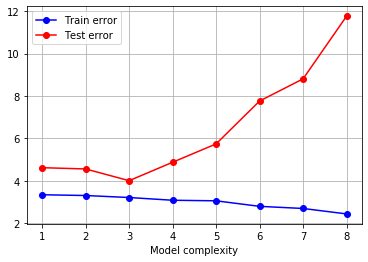

In [17]:
plt.plot(list_complexities,np.log(trainerrors),'bo-')    
plt.plot(list_complexities,np.log(testerrors),'ro-')    
plt.legend(["Train error","Test error"])
plt.xlabel('Model complexity')
plt.grid(1)

### XKCD Style Plots - You Can Do It!

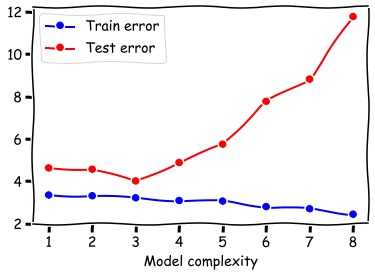

In [18]:
with plt.xkcd():
    plt.plot(list_complexities,np.log(trainerrors),'bo-')    
    plt.plot(list_complexities,np.log(testerrors),'ro-')    
    plt.legend(["Train error","Test error"])
    plt.xlabel('Model complexity')
    plt.grid(1)

## Sklearn (Scikit-Learn) 
https://scikit-learn.org

SKlearn Design Principles
* Consistency
    - Estimators
        "fit(x)" or "fit(x,y)"
    - Transformers
        additional method "transform()" to be called afer fit()
    - Predictors
        method "predict()"
* Inspection
    the (hyper)parameters are accessible (public members of the classes)
* Avoid proliferation of classes
    inputs/outputs usually numpy arrays and scipy sparse matrices
* Reasonable defaults
    good initial values for the hyperparameters, usually no need to change those
    


* No need for us to reinvent the wheel
* We will just use ready-made methods from numpy, sklearn 
* Getting started guide https://scikit-learn.org/stable/getting_started.html

# Cross-Validation

* Splitting the data in train and test sets can be unlucky
* How to eliminate (reduce the importance of) the random factor?

* Split in half: train on one half, test on the other
* Then reverse the roles
* Aggregate (average) the errors
* This is ``two-fold cross-validation''

### N-fold Cross-Validation

* Split in N equal parts
* First leave the first part as test, train on the rest, evaluate on test
* Then the second, then the third, etc
* Aggregate the errors

### CV in sklearn

In [19]:
#ValueError: 'rmse' is not a valid scoring value. Use sklearn.metrics.get_scorer_names() to get valid options.
import sklearn
import sklearn.metrics
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

### CV in sklearn

In [20]:
ds_x[:,np.newaxis][:3]

array([[-0.39507484],
       [-2.78472433],
       [ 0.22054495]])

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

print("=============== 2")
m = make_pipeline(
    PolynomialFeatures(2),
    LinearRegression())

=============== 2


In [23]:
# plt.plot(x,y,'o');plt.plot(x,m.predict(x[:,np.newaxis]),'go')

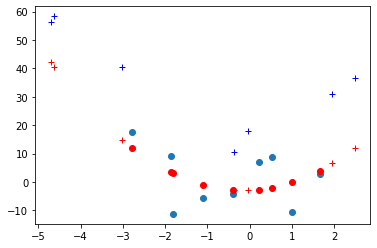

In [24]:
plt.plot(x,y,'o');plt.plot(x_test,y_test,'b+');
m.fit(x[:,np.newaxis],y)
plt.plot(x,m.predict(x[:,np.newaxis]),'ro')
plt.plot(x_test,m.predict(x_test[:,np.newaxis]),'r+')

In [26]:
# cross_val_score?

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

print("=============== 2")
m = make_pipeline(
    PolynomialFeatures(2),
    LinearRegression()
)
scores=cross_val_score(m,ds_x[:,np.newaxis],ds_y[:,np.newaxis],cv=3,scoring='neg_root_mean_squared_error')
errors=-scores
print(errors)
print(f"cross-validation error= {np.mean(errors)}")

print("=============== 5")
m = make_pipeline(
    PolynomialFeatures(5),
    LinearRegression()
)
scores=cross_val_score(m,ds_x[:,np.newaxis],ds_y[:,np.newaxis],cv=3,scoring='neg_root_mean_squared_error')
errors=-scores
print(errors)
print(f"cross-validation error= {np.mean(errors)}")

=============== 2
[15.22537946 12.48318962 33.51450797]
cross-validation error= 20.407692348637344
=============== 5
[  13.47061958   13.67451817 1226.5288198 ]
cross-validation error= 417.89131918314234


### Where this lecture finally gets deeper

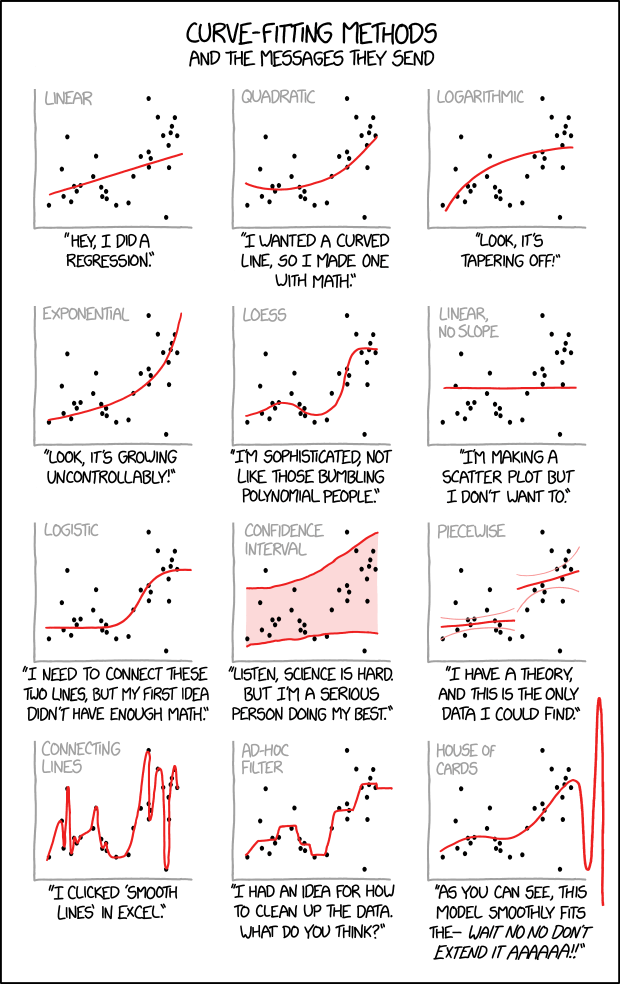

https://xkcd.com/2048/

https://www.explainxkcd.com/wiki/index.php/2048:_Curve-Fitting